# Bank Personal Loan Modelling:- Identifying the Potential Customers for Loans.

# Q1. Import the required libraries and read the dataset.

In [1]:
# Numerical libraries
import math
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [17]:
bankdata = pd.read_csv('Bank_Loan.csv')

# Q2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
bankdata.shape

(5000, 14)

In [4]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bankdata.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Observations : 

1. We could see the dataset has no null values 
2. we could see the ID is a primary column to the dataset and it is in equal incremental order
3. we could see the maximum annual income is 224 $

# Q3.Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant

In [11]:
bankdata.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [12]:
print('The sum of All duplicate values in dataset is :',bankdata.duplicated().sum())

The sum of All duplicate values in dataset is : 0


we could see no duplicate values in dataset

# Q4. Display the Five Point Summary and write your key findings.

In [13]:
# Calculating the five-number summary using the describe() method
five_number_summary = bankdata.describe(percentiles=[.25, .50, .75])

# Key Findings:
# You can provide yfive_number_summaryour key findings based on the summary statistics and your domain knowledge.
# Here are some examples:
# - The dataset contains information about bank loans.
# - The 'age' column represents the age of loan applicants.
# - The 'income' column represents the income of loan applicants.
# - The 'loan_amount' column represents the loan amount requested.
# - The 'credit_score' column represents the credit score of loan applicants.
# - The 'approval' column indicates loan approval status (1 for approved, 0 for not approved).
# - The median age of loan applicants is [median value].
# - The average income of loan applicants is [mean value].
# - The 25th percentile (Q1) of loan amounts is [25th percentile value], indicating that 25% of loans are below this amount.
# - The 75th percentile (Q3) of credit scores is [75th percentile value], indicating that 25% of credit scores are above this value.
# - Etc.

# You can add more specific findings based on your analysis and domain knowledge.


In [14]:
five_number_summary

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Observations :

The 25th percentile (Q1) of loan amounts is 25th percentile value, indicating that 25% of loans are below this amount.
The 75th percentile (Q3) of credit scores is 75th percentile value, indicating that 25% of credit scores are above this value.

# Q5.There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint:.abs function)

In [18]:
bankdata[bankdata['Experience']<0].value_counts().sum()

52

there are total 52 rows has negative columns 

In [19]:
## Converting negative 'Experience' values to non-negative (absolute values)
bankdata['Experience'] = bankdata['Experience'].abs()

In [20]:
#post verfication : of negative values 
bankdata[bankdata['Experience']<0].value_counts().sum()

0

# Q6. Get the target column distribution and comment on the class distribution.

In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
#taking the Personal loan as target column 
# then using replace function to change 0 to 'No' and 1 to 'Yes'
Personalloan_distribution = bankdata['Personal Loan'].replace({0: 'No', 1: 'Yes'})

In [22]:
bankdata['Personal Loan']==0

0       True
1       True
2       True
3       True
4       True
        ... 
4995    True
4996    True
4997    True
4998    True
4999    True
Name: Personal Loan, Length: 5000, dtype: bool

In [23]:
Personalloan_distribution2 = bankdata['Personal Loan'].apply(lambda x: 'Yes' if (x == 1) else 'No') 

In [24]:
Personalloan_distribution2

0       No
1       No
2       No
3       No
4       No
        ..
4995    No
4996    No
4997    No
4998    No
4999    No
Name: Personal Loan, Length: 5000, dtype: object

In [25]:
Personalloan_distribution2.unique()

array(['No', 'Yes'], dtype=object)

In [26]:
Personalloan_distribution2.value_counts()

No     4520
Yes     480
Name: Personal Loan, dtype: int64

(array([4520.,  480.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

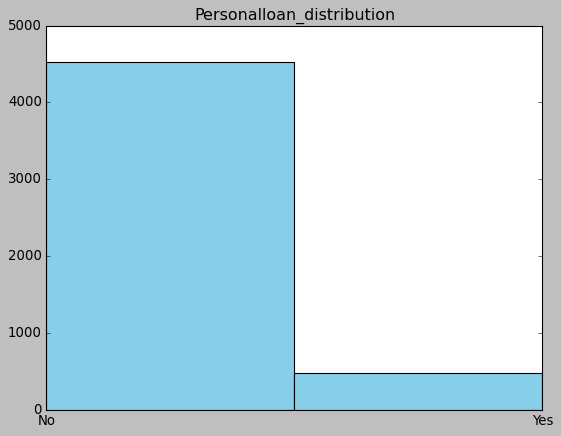

In [38]:
plt.title("Personalloan_distribution")
plt.hist(Personalloan_distribution2,bins=2, color='skyblue', edgecolor='black') 

we could see as per distribution the there are taking low number of personal loans 

# Q7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.

In [39]:
# Extracting the target column 'Personal Loan' into y
y = bankdata['Personal Loan']

# Extracting the rest of the columns as features into x
x = bankdata.drop('Personal Loan', axis=1)


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [41]:
x.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


# Q8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [42]:
# Spliting the dataset into training (70%) and testing (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# X_train_scaled and X_test_scaled now contain the standardized feature values


In [43]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1840,1841,55,25,23,93106,4,0.4,3,88,0,0,0,0
2115,2116,57,31,30,95070,3,1.4,1,0,0,0,0,0
4437,4438,63,38,63,92507,2,1.5,1,0,0,0,1,0
1146,1147,31,7,71,90034,1,0.1,1,78,1,0,0,0
2486,2487,61,36,130,92717,1,1.3,1,257,0,0,0,0


In [44]:
y_train.head()

1840    0
2115    0
4437    0
1146    0
2486    0
Name: Personal Loan, dtype: int64

In [45]:
x_test.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1501,1502,30,4,35,92130,2,0.3,2,0,1,0,0,1
2586,2587,47,23,149,92675,4,6.1,1,0,0,0,0,1
2653,2654,30,5,121,94555,2,3.1,1,408,0,0,1,0
1055,1056,31,6,62,95630,1,1.0,1,0,1,0,1,0
705,706,62,36,30,94720,3,0.7,2,0,0,0,1,0


In [46]:
y_test.head()

1501    0
2586    1
2653    0
1055    0
705     0
Name: Personal Loan, dtype: int64

In [47]:
x_train_scaled

array([[-0.47189175,  0.8637215 ,  0.44850537, ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [-0.28001648,  1.03798438,  0.97368731, ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [ 1.34010849,  1.560773  ,  1.58639956, ..., -0.2532849 ,
         0.82039024, -0.65153774],
       ...,
       [ 0.40166401, -0.18185576, -0.16420688, ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [ 0.87611921, -0.87890726, -0.86444946, ..., -0.2532849 ,
         0.82039024, -0.65153774],
       [-1.15566543,  1.03798438,  0.97368731, ..., -0.2532849 ,
        -1.2189321 , -0.65153774]])

In [48]:
x_test_scaled

array([[-0.70842162, -1.31456446, -1.3896314 , ..., -0.2532849 ,
        -1.2189321 ,  1.53483051],
       [ 0.04861352,  0.16666999,  0.27344473, ..., -0.2532849 ,
        -1.2189321 ,  1.53483051],
       [ 0.09536131, -1.31456446, -1.30210108, ..., -0.2532849 ,
         0.82039024, -0.65153774],
       ...,
       [-0.47398494, -0.18185576, -0.16420688, ..., -0.2532849 ,
         0.82039024,  1.53483051],
       [-0.0951185 , -0.44325007, -0.33926753, ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [-0.42165532, -0.2689872 , -0.33926753, ...,  3.94812332,
         0.82039024, -0.65153774]])

# Q9.Train and test a Logistic Regression model to predict the likelihood of a liability customer buying personal loans. Display the train and test accuracy scores

In [49]:
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model on the training data
logistic_regression_model.fit(x_train_scaled, y_train)

# Predict on the training data
train_predictions = logistic_regression_model.predict(x_train_scaled)

# Predict on the test data
test_predictions = logistic_regression_model.predict(x_test_scaled)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# printing the train and test accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9522857142857143
Test Accuracy: 0.9486666666666667


In [50]:
# Initialize the Logistic Regression model
logistic_regression_model2 = LogisticRegression()

# Train the model on the training data
logistic_regression_model2.fit(x_train_scaled, y_train)

# Predict on the training data
train_predictions2 = logistic_regression_model2.predict(x_train_scaled)

# Predict on the test data
test_predictions2 = logistic_regression_model2.predict(x_test_scaled)

# Calculate the accuracy scores
train_accuracy2 = accuracy_score(y_train, train_predictions)
test_accuracy2 = accuracy_score(y_test, test_predictions)

# Display the train and test accuracy scores
print("Train Accuracy:", train_accuracy2)
print("Test Accuracy:", test_accuracy2)

Train Accuracy: 0.9522857142857143
Test Accuracy: 0.9486666666666667


# Q10. Print the confusion matrix and classification report for the model and write your conclusions on the results

In [51]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[1323   20]
 [  57  100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.83      0.64      0.72       157

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



The confusion matrix provides information about true positives, true negatives, false positives, and false negatives.

The classification report includes precision, recall, and F1-score for each class, as well as overall metrics.

we can analyze the results to assess the model's performance in terms of correctly predicting personal loan purchases and non-purchases.